# Post processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.lines import Line2D


import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.figsize']

[6.0, 4.0]

## Plot capacity factors for the location

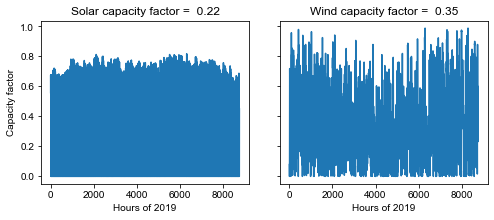

In [2]:

df_solar = pd.read_csv('data/Solar.csv', sep=',', index_col=0,parse_dates=True, skiprows=3 ) # in MWh
CF_solar=df_solar['electricity']
df_wind = pd.read_csv('data/Wind.csv', sep=',', index_col=0,parse_dates=True, skiprows=3 ) # in MWh
CF_wind=df_wind['electricity']
df_solar['load']=100
load=df_solar['load']


fig, axs = plt.subplots(1,2,figsize=(8,3),gridspec_kw={'wspace':0.15,'hspace':0.15}, sharey=True)

axs[0].plot(np.arange(1,8761),CF_solar)
axs[0].set_title('Solar capacity factor = % 0.2f' % (np.mean(CF_solar)))


axs[1].plot(np.arange(1,8761),CF_wind)
axs[1].set_title('Wind capacity factor = % 0.2f' % (np.mean(CF_wind)))
axs[0].set_ylabel('Capacity factor')

axs[0].set_xlabel('Hours of 2019')
axs[1].set_xlabel('Hours of 2019')
plt.savefig("CapacityFactorM.jpg",dpi=600,bbox_inches='tight')


In [3]:
np.mean(CF_solar)

0.22355764840182651

## Read Data

In [4]:
df=pd.read_csv('Thermal_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
MoltenS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
MoltenS.loc[MoltenS.power<= 301000, 'power'] = np.nan

factorc=0.097
MoltenS.power= MoltenS.power*factorc/MoltenS.effi+ MoltenS.power*(1-factorc)

In [5]:
df=pd.read_csv('LiquidAir_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
LiquidAirS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
LiquidAirS.loc[LiquidAirS.power<= 301000, 'power'] = np.nan

factorc=0.5
LiquidAirS.power= LiquidAirS.power*factorc/LiquidAirS.effi+ LiquidAirS.power*(1-factorc)



df=pd.read_csv('PumpedThermal_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
PumpedThermalS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
PumpedThermalS.loc[PumpedThermalS.power<= 301000, 'power'] = np.nan
factorc=0.33

PumpedThermalS.power= PumpedThermalS.power*factorc/PumpedThermalS.effi+ PumpedThermalS.power*(1-factorc)

df=pd.read_csv('CompressAir_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
CompressedS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
CompressedS.loc[CompressedS.power<= 301000, 'power'] = np.nan

factorc=0.33

CompressedS.power= CompressedS.power*factorc/CompressedS.effi+ CompressedS.power*(1-factorc)

In [6]:
df=pd.read_csv('Battery_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
BatteryS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
BatteryS.loc[BatteryS.power<= 101000, 'power'] = np.nan

factorc=0.5

BatteryS.power= BatteryS.power*factorc/BatteryS.effi+ BatteryS.power*(1-factorc)


df=pd.read_csv('Hydrogen_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
HydrogenS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
HydrogenS.loc[HydrogenS.power<= 301000, 'power'] = np.nan

## Plot cost Curves

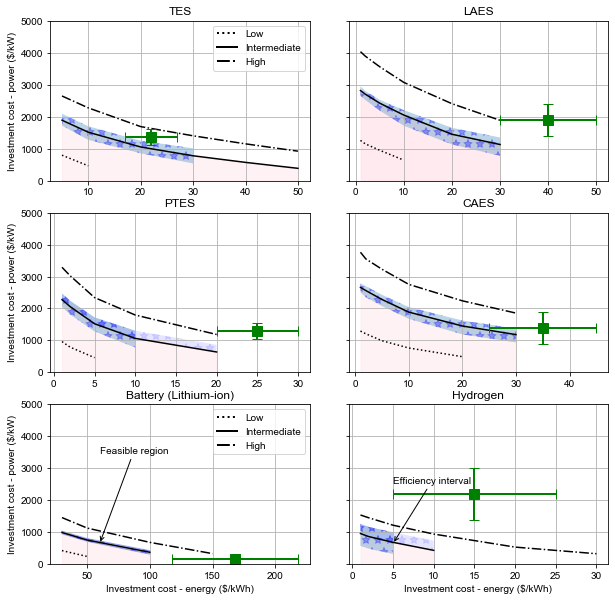

In [9]:
from itertools import cycle
fig, axs = plt.subplots(3,2,figsize=(10,10),gridspec_kw={'wspace':0.15,'hspace':0.2}, sharey=True)


lines = [':', '-', '-.']
linecycler = cycle(lines)


A=MoltenS.loc[MoltenS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[0,0].fill_between(x,0,a,alpha=0.2, color='pink')
axs[0,0].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )


for j in np.unique(MoltenS.fuel_cost):
    A=MoltenS.loc[MoltenS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[0,0].plot(x,a,linestyle=next(linecycler),color='black') 
axs[0,0].errorbar(22, 1350,
             yerr = 250,
             xerr = 5,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[0,0].set_title('TES')
axs[0,0].set_ylabel('Investment cost - power ($/kW)')
axs[0,0].grid()
linestyle = lines
lines = [Line2D([0], [0], color='black', linewidth=2, linestyle=c) for c in linestyle]
labels = ['Low', 'Intermediate','High',]
axs[0,0].legend(lines, labels)

####################

A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[1,0].fill_between(x,0,a,alpha=0.2, color='pink')
axs[1,0].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )
axs[1,0].fill_between(x,a,y2,alpha=0.1, hatch="*", edgecolor="b", facecolor="b",linewidth=0.0 )
for j in np.unique(PumpedThermalS.fuel_cost):
    A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[1,0].plot(x,a,linestyle=next(linecycler),color='black') 

axs[1,0].errorbar(25, 1300,
             yerr = 250,
             xerr = 5,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[1,0].set_title('PTES')
axs[1,0].set_ylabel('Investment cost - power ($/kW)')
#axs[1,0].set_xlabel('Investment cost - energy ($/kWh)')
axs[1,0].grid()

#############################################


A=LiquidAirS.loc[LiquidAirS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[0,1].fill_between(x,0,a,alpha=0.3,color='pink' )
axs[0,1].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )

for j in np.unique(LiquidAirS.fuel_cost):
    A=LiquidAirS.loc[LiquidAirS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000   
    axs[0,1].plot(x,a,linestyle=next(linecycler),color='black') 

axs[0,1].errorbar(40, 1900,
             yerr = 500,
             xerr = 10,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[0,1].set_title('LAES')
axs[0,1].grid()

#############################################


A=CompressedS.loc[CompressedS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[1,1].fill_between(x,0,a,alpha=0.2, color='pink')
axs[1,1].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )

for j in np.unique(CompressedS.fuel_cost):
    A=CompressedS.loc[CompressedS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[1,1].plot(x,a,linestyle=next(linecycler),color='black') 

axs[1,1].errorbar(35, 1400,
             yerr = 500,
             xerr = 10,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[1,1].set_title('CAES')
#axs[1,1].set_xlabel('Investment cost - energy($/kWh)')
axs[1,1].grid()


lines = [':', '-', '-.']
linecycler = cycle(lines)

A=BatteryS.loc[BatteryS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[2,0].fill_between(x,0,a,alpha=0.2, color='pink')
axs[2,0].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=1.0 )


for j in np.unique(BatteryS.fuel_cost):
    A=BatteryS.loc[BatteryS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[2,0].plot(x,a,linestyle=next(linecycler),color='black') 
axs[2,0].errorbar(168, 156,
             yerr = 100,
             xerr = 50,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[2,0].set_title('Battery (Lithium-ion)')
axs[2,0].set_xlabel('Investment cost - energy ($/kWh)')
axs[2,0].grid()
linestyle = lines
lines = [Line2D([0], [0], color='black', linewidth=2, linestyle=c) for c in linestyle]
labels = ['Low', 'Intermediate','High',]
axs[2,0].legend(lines, labels)
axs[2,0].set_ylabel('Investment cost - power ($/kW)')


#############################################


lines = [':', '-', '-.']
linecycler = cycle(lines)

A=HydrogenS.loc[HydrogenS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[2,1].fill_between(x,0,a,alpha=0.2, color='pink')
axs[2,1].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )
axs[2,1].fill_between(x,a,y2,alpha=0.1, hatch="*", edgecolor="b", facecolor="b",linewidth=0.0 )


for j in np.unique(HydrogenS.fuel_cost):
    A=HydrogenS.loc[HydrogenS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[2,1].plot(x,a,linestyle=next(linecycler),color='black') 
axs[2,1].errorbar(15, 2200,
             yerr = 800,
             xerr = 10,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[2,1].set_title('Hydrogen')

axs[2,1].grid()
linestyle = lines
lines = [Line2D([0], [0], color='black', linewidth=2, linestyle=c) for c in linestyle]
labels = ['Low', 'Intermediate','High',]

axs[2,1].set_xlabel('Investment cost - energy ($/kWh)')




axs[2,0].annotate('Feasible region', xy=(60, 650),  xycoords='data',
            xytext=(0, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

axs[2,1].annotate('Efficiency interval', xy=(5, 650),  xycoords='data',
            xytext=(0, 60), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

axs[2,1].set_ylim([0,5000])

plt.savefig("Main5.jpg",dpi=600,bbox_inches='tight')